In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import time
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Data Collect

In [2]:
# csv_path = "https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1626134400&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true" # new stocks
btc_path = "https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1410912000&period2=1626048000&interval=1d&events=history&includeAdjustedClose=true"
#eth_path = "https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1=1410912000&period2=1626048000&interval=1d&events=history&includeAdjustedClose=true"
#ada_path = "https://query1.finance.yahoo.com/v7/finance/download/ADA-USD?period1=1410912000&period2=1626048000&interval=1d&events=history&includeAdjustedClose=true"


stock_prices = pd.read_csv(btc_path, parse_dates=['Date'])

stock_prices.sort_values('Date', inplace=True)

stock_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
stock_prices.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2486,2021-07-08,33889.605469,33907.906250,32133.183594,32877.371094,32877.371094,2.991040e+10
2487,2021-07-09,32861.671875,34042.292969,32318.880859,33798.011719,33798.011719,2.743602e+10
2488,2021-07-10,33811.242188,34209.070313,33116.011719,33520.519531,33520.519531,2.297187e+10
2489,2021-07-11,33509.078125,34584.703125,33346.738281,34240.187500,34240.187500,2.010873e+10
2490,2021-07-12,34254.015625,34592.156250,32697.308594,33155.847656,33155.847656,2.432150e+10


In [4]:
stock_prices.shape

(2491, 7)

## Descripción de los datos
Antes de describir los datos vamos a realizar un cambio en el orden de las columnas para hacerlas más intuitivas a las hora de realizar el código.

In [5]:
colnames = {
    'Date': 'date',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adjClose',
    'Volume': 'volume'
}
stock_prices.rename(columns = colnames, inplace=True)

stock_prices.head()

,date,open,high,low,close,adjClose,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [6]:
stock_prices['date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    2491
unique                   2491
top       2016-11-14 00:00:00
freq                        1
first     2014-09-17 00:00:00
last      2021-07-12 00:00:00
Name: date, dtype: object

In [7]:
print(stock_prices['open'].head())
stock_prices['open'].describe()

0    465.864014
1    456.859985
2    424.102997
3    394.673004
4    408.084991
Name: open, dtype: float64


count     2487.000000
mean      8035.557402
std      12049.575929
min        176.897003
25%        529.789002
50%       4570.359863
75%       9307.520996
max      63523.753906
Name: open, dtype: float64

In [8]:
print(stock_prices['high'].head())
stock_prices['high'].describe()

0    468.174011
1    456.859985
2    427.834991
3    423.295990
4    412.425995
Name: high, dtype: float64


count     2487.000000
mean      8265.625742
std      12426.936249
min        211.731003
25%        543.714508
50%       4655.040039
75%       9464.549805
max      64863.097656
Name: high, dtype: float64

In [9]:
print(stock_prices['low'].head())
stock_prices['low'].describe()

0    452.421997
1    413.104004
2    384.532013
3    389.882996
4    393.181000
Name: low, dtype: float64


count     2487.000000
mean      7779.469894
std      11599.744147
min        171.509995
25%        521.812500
50%       4365.640137
75%       9148.923340
max      62208.964844
Name: low, dtype: float64

In [10]:
print(stock_prices['close'].head())
stock_prices['close'].describe()

0    457.334015
1    424.440002
2    394.795990
3    408.903992
4    398.821014
Name: close, dtype: float64


count     2487.000000
mean      8047.622041
std      12057.099669
min        178.102997
25%        532.625000
50%       4579.020020
75%       9315.120117
max      63503.457031
Name: close, dtype: float64

In [11]:
print(stock_prices['adjClose'].head())
stock_prices['adjClose'].describe()

0    457.334015
1    424.440002
2    394.795990
3    408.903992
4    398.821014
Name: adjClose, dtype: float64


count     2487.000000
mean      8047.622041
std      12057.099669
min        178.102997
25%        532.625000
50%       4579.020020
75%       9315.120117
max      63503.457031
Name: adjClose, dtype: float64

In [12]:
print(stock_prices['volume'].head())
stock_prices['volume'].describe()

0    21056800.0
1    34483200.0
2    37919700.0
3    36863600.0
4    26580100.0
Name: volume, dtype: float64


count    2.487000e+03
mean     1.296685e+10
std      1.981840e+10
min      5.914570e+06
25%      6.949860e+07
50%      4.148070e+09
75%      1.963978e+10
max      3.509679e+11
Name: volume, dtype: float64

## Calidad de los datos

In [13]:
def nulos_x_fila(fila):
    nulos = len(fila) - fila.count() #Se calcula la cantidad de valores nulos en la fila
    umbral = 0.2 
    #Se evalua si se supera el umbral definido
    if (nulos > (len(fila) * umbral)):
        return False
    else:
        return True
      
stock_prices['completitudF'] = stock_prices.apply(lambda row: nulos_x_fila(row), axis=1)
stock_prices.head()

,date,open,high,low,close,adjClose,volume,completitudF
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,True
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,True
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,True
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,True
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,True


In [14]:
stock_prices.shape[0]

2491

In [15]:
print(stock_prices['completitudF'].value_counts())
#(stock_prices['completitudF'].value_counts()[False] / stock_prices.shape[0]) * 100

True     2487
False       4
Name: completitudF, dtype: int64


In [16]:
completitud_d = (len(stock_prices['completitudF']) - sum(stock_prices['completitudF'])) / len(stock_prices['completitudF']) * 100
print(completitud_d, '%')

0.16057808109193095 %


In [17]:
stock_prices.fillna(method="ffill", inplace=True)
stock_prices.isna().sum()

date            0
open            0
high            0
low             0
close           0
adjClose        0
volume          0
completitudF    0
dtype: int64

In [18]:
stock_prices.drop(['completitudF'], axis=1, inplace=True)
stock_prices

,date,open,high,low,close,adjClose,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2486,2021-07-08,33889.605469,33907.906250,32133.183594,32877.371094,32877.371094,2.991040e+10
2487,2021-07-09,32861.671875,34042.292969,32318.880859,33798.011719,33798.011719,2.743602e+10
2488,2021-07-10,33811.242188,34209.070313,33116.011719,33520.519531,33520.519531,2.297187e+10
2489,2021-07-11,33509.078125,34584.703125,33346.738281,34240.187500,34240.187500,2.010873e+10


## Feature building

Para contruir el atributo **go_up** vamos a basarnos en el atributo **close** inicialmente, en futuras iteraciones veremos otras maneras de hacerlo si es conveniente.

In [19]:
stock_prices['go_up'] = stock_prices.apply(lambda row: row.name > 0 and row['close'] > stock_prices.loc[ row.name-1 , : ]['close'], axis=1)
stock_prices.head()

,date,open,high,low,close,adjClose,volume,go_up
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,False
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,False
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,False
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,True
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,False


In [20]:
stock_prices.dtypes

date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
adjClose           float64
volume             float64
go_up                 bool
dtype: object

In [21]:
close_df = stock_prices.drop(['adjClose'], axis=1)
close_df.head()

,date,open,high,low,close,volume,go_up
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,False
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,False
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,False
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,True
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,False


In [22]:
close_ts = close_df.set_index('date')
close_ts

,open,high,low,close,volume,go_up
date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07,False
...,...,...,...,...,...,...
2021-07-08,33889.605469,33907.906250,32133.183594,32877.371094,2.991040e+10,False
2021-07-09,32861.671875,34042.292969,32318.880859,33798.011719,2.743602e+10,True
2021-07-10,33811.242188,34209.070313,33116.011719,33520.519531,2.297187e+10,False


## Dataset as timeseries

In [23]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(8,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

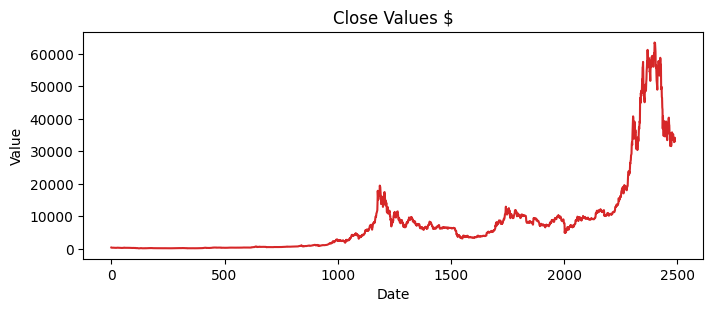

In [24]:
plot_df(close_df, x=close_df.index, y=close_df.close, title='Close Values $')    

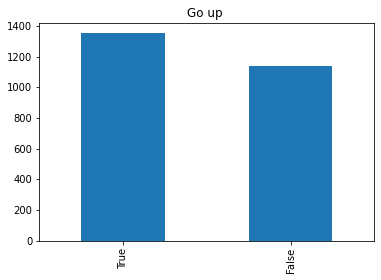

In [25]:
close_df['go_up'].value_counts().plot(kind='bar', title='Go up ')

## Save Dataset

In [26]:
close_df.to_csv('btcStocks.csv', index=False)